# Machine Learning and Fintech Hw 3

### import module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

### read data

In [2]:
csv_file = "Stocks_ClosePrice.csv"
data = pd.read_csv(csv_file)
data.head()

,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
0,2018/9/24,165.410004,1173.369995,369.609985,1934.359985,220.789993,NaN,NaN,NaN,NaN,NaN
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506


### data preprocess

In [3]:
return_data = data.iloc[1:, 6:11]
return_data.head()

,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
1,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,0.011257,0.011915,0.007461,0.019124,0.020343
4,-0.026284,-0.000980,-0.017435,-0.004970,0.003506
5,-0.012359,0.001541,0.019324,0.000679,0.006711


## a) Find the mean and standard deviation of returns of these five stocks. 

### mean of returns

In [4]:
mu = return_data.mean(axis=0)
print('mean of returns:', mu, sep='\n')

mean of returns:
FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64


### standard deviation of returns

In [5]:
std = return_data.std()
print('standard deviation of returns:', std, sep='\n')

standard deviation of returns:
FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64


In [6]:
cov = return_data.cov()
print('cov:', cov, sep='\n')

cov:
            FB.1    GOOG.1    NFLX.1    AMZN.1    AAPL.1
FB.1    0.000439  0.000258  0.000302  0.000319  0.000236
GOOG.1  0.000258  0.000341  0.000308  0.000307  0.000246
NFLX.1  0.000302  0.000308  0.000735  0.000427  0.000310
AMZN.1  0.000319  0.000307  0.000427  0.000498  0.000316
AAPL.1  0.000236  0.000246  0.000310  0.000316  0.000417


In [7]:
corr = return_data.corr()
print('corr:', corr, sep='\n')

corr:
            FB.1    GOOG.1    NFLX.1    AMZN.1    AAPL.1
FB.1    1.000000  0.666629  0.532532  0.683512  0.552880
GOOG.1  0.666629  1.000000  0.614275  0.744121  0.652473
NFLX.1  0.532532  0.614275  1.000000  0.705013  0.560549
AMZN.1  0.683512  0.744121  0.705013  1.000000  0.693429
AAPL.1  0.552880  0.652473  0.560549  0.693429  1.000000


## b) Plot the mean and risk (standard deviation) for these five returns using red starts in the 2-dimensional plane. 

### plot

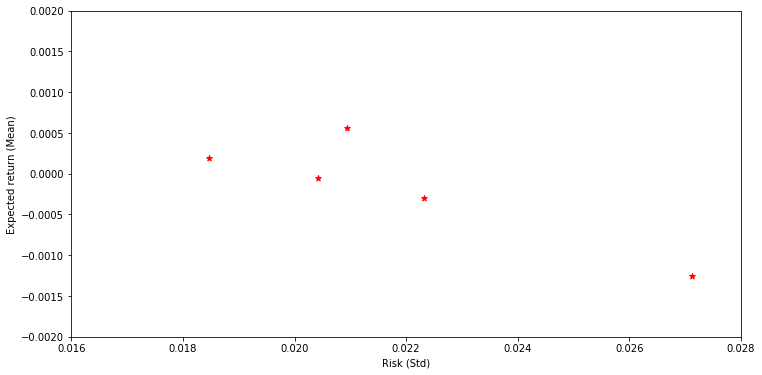

In [8]:
plt.figure(figsize = (12, 6))
plt.scatter(std, mu, color='r', marker='*')
plt.ylabel('Expected return (Mean)')
plt.xlabel('Risk (Std)')
plt.axis([0.016, 0.028, -0.002, 0.002])
plt.show()

## c) Randomly selected weights so that each weight is nonnegative and sums up to one. Print the random weight, the mean and standard deviation of the portfolio.

In [9]:
nStock = len(return_data.columns)
print('nStock:', nStock)

nStock: 5


In [10]:
nMC = 1

In [11]:
mcMu_list = []
mcStd_list = []

### generate random weights

In [12]:
weight = np.random.rand(nMC, nStock)
print('weight:', weight)

weight: [[0.35465921 0.88926068 0.02938949 0.1200093  0.36957829]]


### standardlize weights to sum = 1

In [13]:
# method1
rowsum = np.sum(weight, axis=1, keepdims=1)
print('rowsum:', rowsum)
weight /= rowsum
print('weight:', weight)
rowsum_check = np.sum(weight, axis=1)
print('rowsum_check:', rowsum_check)

# # method2
# rowsum = np.sum(weight, axis=1)
# print('rowsum:', rowsum)
# for idx in range(nMC):
#     for idy in range(nStock):
#         weight[idx, idy] /= rowsum[idx]
# print('weight:', weight)
# rowsum_check = np.sum(weight, axis=1)
# print('rowsum_check:', rowsum_check)

rowsum: [[1.76289697]]
weight: [[0.20117977 0.50443145 0.01667114 0.06807505 0.20964259]]
rowsum_check: [1.]


### mean of the portfolio

In [14]:
# matmul: 矩陣乘法
array_mu = mu.values
mcMu = np.matmul(weight, array_mu)
# mcMu = np.matmul(weight, mu)
print('mean of the portfolio:', mcMu)
mcMu_list.append(mcMu)

mean of the portfolio: [0.00015389]


### standard deviation of the portfolio

In [15]:
# print('cov:', cov, sep='\n')
array_Cov = cov.values
# print('array_Cov:', array_Cov, sep='\n')

mcCov = np.zeros(nMC)
mcStd = np.zeros(nMC)

for idx in range(nMC):
    # mcCov[idx] = np.dot(np.dot(weight[idx, :], array_Cov), weight[idx, :])
    mcCov[idx] = np.matmul(np.matmul(weight[idx, :], array_Cov), weight[idx, :])
    mcStd[idx] = np.sqrt(mcCov[idx])
    print('id:', idx, 'mcCov:', mcCov[idx], 'mcStd:', mcStd[idx])
    mcStd_list.append(mcStd)
    print('standard deviation of the portfolio:', mcStd[idx])

id: 0 mcCov: 0.0002989608003437982 mcStd: 0.01729048294131191
standard deviation of the portfolio: 0.01729048294131191


### plot

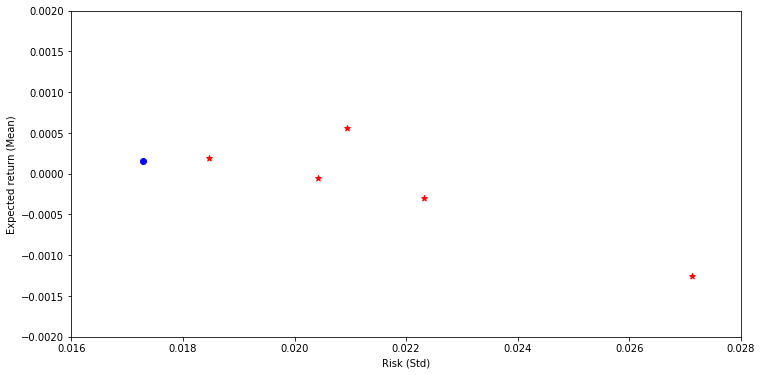

In [16]:
plt.figure(figsize = (12, 6))
plt.scatter(mcStd_list, mcMu_list, color='b')
plt.scatter(std, mu, color='r', marker='*')
plt.ylabel('Expected return (Mean)')
plt.xlabel('Risk (Std)')
plt.axis([0.016, 0.028, -0.002, 0.002])
plt.show()

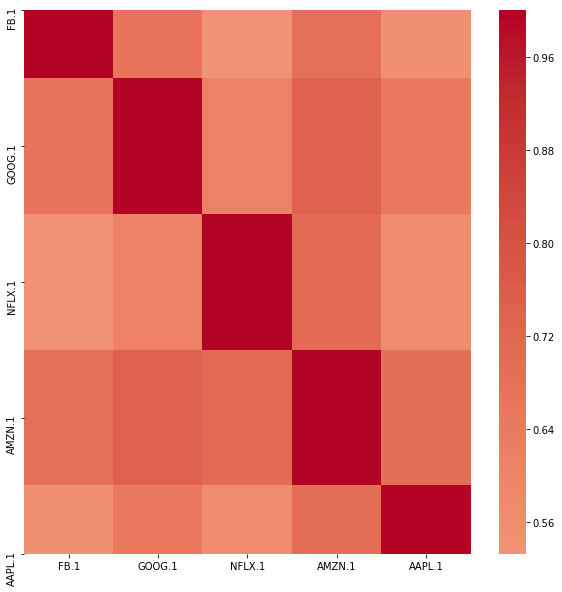

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False, center=0.0, cmap='coolwarm'); # cmap="YlGnBu",
plt.show()

## d) Repeat c) for 1000 times, and plot the mean and standard deviation for these artificial portfolios using blue points in the 2-dimensional plane in b). 

### method1 - for loop

In [18]:
for _ in range(1000):
    nMC = 1

    weight_new = np.random.rand(nMC, nStock)

    rowsum = np.sum(weight_new, axis=1, keepdims=1)
    weight_new /= rowsum
    rowsum_check = np.sum(weight, axis=1)

    # matmul: 矩陣乘法
    array_mu = mu.values
    mcMu_new = np.matmul(weight_new, array_mu)
    # mcMu = np.matmul(weight, mu)
    mcMu_list.append(mcMu_new)

    array_Cov = cov.values

    mcCov_new = np.zeros(nMC)
    mcStd_new = np.zeros(nMC)

    for idx in range(nMC):
        mcCov_new[idx] = np.matmul(np.matmul(weight_new[idx, :], array_Cov), weight_new[idx, :])
        mcStd_new[idx] = np.sqrt(mcCov_new[idx])
        mcStd_list.append(mcStd_new)

#### plot

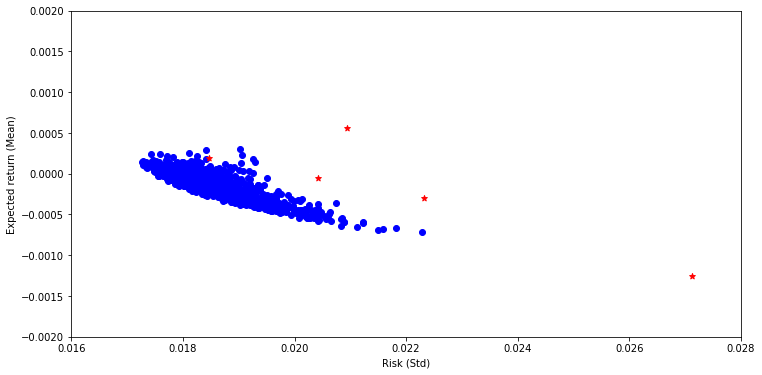

In [19]:
plt.figure(figsize = (12, 6))
plt.scatter(mcStd_list, mcMu_list, color='b')
plt.scatter(std, mu, color='r', marker='*')
plt.ylabel('Expected return (Mean)')
plt.xlabel('Risk (Std)')
plt.axis([0.016, 0.028, -0.002, 0.002])
plt.show()

### method2 - matrix

In [20]:
nMC_1000 = 1000

#### generate 1000 random weights

In [21]:
weight_1000 = np.random.rand(nMC_1000, nStock)
print('weight_1000:', weight_1000, sep='\n')

weight_1000:
[[0.28414166 0.68418073 0.61948437 0.47095433 0.8326539 ]
 [0.26086272 0.09090644 0.32469024 0.87015431 0.17007754]
 [0.59362105 0.60806575 0.52551555 0.79658082 0.04026848]
 ...
 [0.23431323 0.74809251 0.09904001 0.19063032 0.73778144]
 [0.95870366 0.09445529 0.55898969 0.95233348 0.93942569]
 [0.05535474 0.58738308 0.32899669 0.04624357 0.72194325]]


#### standardlize 1000 weights to sum = 1

In [22]:
rowsum_1000 = np.sum(weight_1000, axis=1, keepdims=1)
print('rowsum_1000:', rowsum_1000, sep='\n')
weight_1000 /= rowsum_1000
print('weight_1000:', weight_1000, sep='\n')
rowsum_check_1000 = np.sum(weight_1000, axis=1)
print('rowsum_check_1000:', rowsum_check_1000, sep='\n')

rowsum_1000:
[[2.891415  ]
 [1.71669125]
 [2.56405165]
 [3.09470677]
 [2.92464847]
 [2.22294632]
 [2.86806955]
 [3.18365654]
 [2.89134735]
 [2.68709612]
 [2.3094257 ]
 [2.71867177]
 [2.43763789]
 [2.20959527]
 [2.62623978]
 [2.09398918]
 [3.42182369]
 [2.96345102]
 [2.45511107]
 [3.51668557]
 [3.02808947]
 [2.26528219]
 [2.33696735]
 [2.82379062]
 [3.05747579]
 [2.61905413]
 [3.17482509]
 [3.09359669]
 [2.33164528]
 [3.31738189]
 [1.94698386]
 [2.01537078]
 [3.6038836 ]
 [2.32947847]
 [1.96582595]
 [2.46495954]
 [2.17555288]
 [1.83318798]
 [2.32845627]
 [2.45963631]
 [3.26796543]
 [2.81529142]
 [3.15364231]
 [2.48768793]
 [1.85895836]
 [2.54106269]
 [2.67662035]
 [3.14194317]
 [3.13649266]
 [3.22133432]
 [2.56915318]
 [3.54205907]
 [2.68602594]
 [2.32853702]
 [2.61564115]
 [1.19205487]
 [2.84134924]
 [2.72732261]
 [3.27182677]
 [1.84546865]
 [3.03649504]
 [1.20874703]
 [2.9952718 ]
 [3.3318987 ]
 [3.40654792]
 [2.64933754]
 [1.90591911]
 [3.1506836 ]
 [2.61392106]
 [2.46317277]
 [3.756

#### mean of the 1000 portfolio

In [23]:
# matmul: 矩陣乘法
array_mu = mu.values
mcMu_1000 = np.matmul(weight_1000, array_mu)
# mcMu = np.matmul(weight, mu)
print('mean of the 1000 portfolio:', mcMu_1000, sep='\n')

mean of the 1000 portfolio:
[-2.33880749e-04 -3.00770202e-04 -1.77591444e-04 -1.94176443e-04
 -3.60209175e-05 -3.66575737e-05 -1.92123002e-04 -3.11170545e-05
 -1.74744591e-04 -2.20227291e-05 -1.75266743e-05 -3.62762039e-04
 -4.92279847e-04 -1.14275989e-04  5.32477310e-05 -3.41108886e-04
 -2.07830947e-04  1.19461911e-04 -1.28323726e-04 -7.10270367e-05
 -4.49153210e-04  1.31212485e-05 -5.40524937e-04 -2.92883990e-04
 -7.45605267e-05 -1.75641992e-04 -4.15023693e-05 -2.75962329e-04
  1.42281871e-04 -2.82764487e-04 -2.11978234e-04 -4.71124561e-05
 -3.15108617e-06 -9.88081031e-05  2.09613564e-04 -2.71944199e-04
 -2.62492429e-05 -1.32266266e-04 -1.28428791e-05 -1.79060598e-04
 -1.63936056e-04 -1.18497271e-04 -2.81410666e-04 -4.33942949e-04
 -1.40302778e-04 -2.70140777e-04 -8.43424763e-05 -2.67489355e-04
 -2.89936755e-04  5.52434034e-05  6.76427661e-05 -2.27206594e-04
  9.06629612e-05 -4.34883441e-04 -2.32460930e-04 -2.21595125e-04
 -9.90498248e-06 -2.95677723e-04  5.10846990e-05 -1.77875240e-

#### standard deviation of the 1000 portfolio

In [24]:
# print('cov:', cov, sep='\n')
array_Cov = cov.values
# print('array_Cov:', array_Cov, sep='\n')

mcCov_1000 = np.zeros(nMC_1000)
mcStd_1000 = np.zeros(nMC_1000)

for idx in range(nMC_1000):
    mcCov_1000[idx] = np.matmul(np.matmul(weight_1000[idx, :], array_Cov), weight_1000[idx, :])
    mcStd_1000[idx] = np.sqrt(mcCov_1000[idx])
    print('id:', idx, 'mcCov:', mcCov_1000[idx], 'mcStd:', mcStd_1000[idx])
    print('standard deviation of the 1000 portfolio:', mcStd_1000[idx])

id: 0 mcCov: 0.0003393453446111071 mcStd: 0.01842132852459635
standard deviation of the 1000 portfolio: 0.01842132852459635
id: 1 mcCov: 0.00039763538265582464 mcStd: 0.019940796941341755
standard deviation of the 1000 portfolio: 0.019940796941341755
id: 2 mcCov: 0.00036280091721115917 mcStd: 0.01904733359846357
standard deviation of the 1000 portfolio: 0.01904733359846357
id: 3 mcCov: 0.0003483108067854338 mcStd: 0.018663086743232853
standard deviation of the 1000 portfolio: 0.018663086743232853
id: 4 mcCov: 0.0003127690673632662 mcStd: 0.017685278266492337
standard deviation of the 1000 portfolio: 0.017685278266492337
id: 5 mcCov: 0.0003131644616922745 mcStd: 0.017696453364792464
standard deviation of the 1000 portfolio: 0.017696453364792464
id: 6 mcCov: 0.0003527200955832398 mcStd: 0.01878084384641009
standard deviation of the 1000 portfolio: 0.01878084384641009
id: 7 mcCov: 0.0003193629945011883 mcStd: 0.017870730105431852
standard deviation of the 1000 portfolio: 0.017870730105431

id: 145 mcCov: 0.000371412774196246 mcStd: 0.019272072389762498
standard deviation of the 1000 portfolio: 0.019272072389762498
id: 146 mcCov: 0.00036396941507914115 mcStd: 0.01907798246878168
standard deviation of the 1000 portfolio: 0.01907798246878168
id: 147 mcCov: 0.00037581327993527 mcStd: 0.019385904155733102
standard deviation of the 1000 portfolio: 0.019385904155733102
id: 148 mcCov: 0.0003719544447160322 mcStd: 0.01928612052010544
standard deviation of the 1000 portfolio: 0.01928612052010544
id: 149 mcCov: 0.0003418790264200624 mcStd: 0.01848997096861059
standard deviation of the 1000 portfolio: 0.01848997096861059
id: 150 mcCov: 0.00032611112829316865 mcStd: 0.018058547236507388
standard deviation of the 1000 portfolio: 0.018058547236507388
id: 151 mcCov: 0.0003705534769710039 mcStd: 0.019249765634183808
standard deviation of the 1000 portfolio: 0.019249765634183808
id: 152 mcCov: 0.00036198143934843853 mcStd: 0.01902580982109404
standard deviation of the 1000 portfolio: 0.01

id: 225 mcCov: 0.0003388299085198953 mcStd: 0.018407333009425764
standard deviation of the 1000 portfolio: 0.018407333009425764
id: 226 mcCov: 0.00039165849441113846 mcStd: 0.0197903636755654
standard deviation of the 1000 portfolio: 0.0197903636755654
id: 227 mcCov: 0.00035612592397201586 mcStd: 0.018871298947661656
standard deviation of the 1000 portfolio: 0.018871298947661656
id: 228 mcCov: 0.0003662472738207225 mcStd: 0.019137587983356796
standard deviation of the 1000 portfolio: 0.019137587983356796
id: 229 mcCov: 0.00037794934547241525 mcStd: 0.019440919357695388
standard deviation of the 1000 portfolio: 0.019440919357695388
id: 230 mcCov: 0.00044573175220526465 mcStd: 0.02111236017609743
standard deviation of the 1000 portfolio: 0.02111236017609743
id: 231 mcCov: 0.00032860758547473485 mcStd: 0.018127536663174477
standard deviation of the 1000 portfolio: 0.018127536663174477
id: 232 mcCov: 0.000370887872542981 mcStd: 0.019258449380544142
standard deviation of the 1000 portfolio:

id: 334 mcCov: 0.0003394309642214879 mcStd: 0.018423652304076082
standard deviation of the 1000 portfolio: 0.018423652304076082
id: 335 mcCov: 0.00031693197435294236 mcStd: 0.01780258336177484
standard deviation of the 1000 portfolio: 0.01780258336177484
id: 336 mcCov: 0.0003471404462703558 mcStd: 0.01863170540423919
standard deviation of the 1000 portfolio: 0.01863170540423919
id: 337 mcCov: 0.0003564236954559544 mcStd: 0.018879186832487103
standard deviation of the 1000 portfolio: 0.018879186832487103
id: 338 mcCov: 0.0003203086405169574 mcStd: 0.017897168505575326
standard deviation of the 1000 portfolio: 0.017897168505575326
id: 339 mcCov: 0.0003415777661781895 mcStd: 0.018481822588105035
standard deviation of the 1000 portfolio: 0.018481822588105035
id: 340 mcCov: 0.00032287105826573183 mcStd: 0.01796861314252527
standard deviation of the 1000 portfolio: 0.01796861314252527
id: 341 mcCov: 0.0003899724110610445 mcStd: 0.019747719135663352
standard deviation of the 1000 portfolio: 0

id: 434 mcCov: 0.00033152420449335013 mcStd: 0.01820780614168962
standard deviation of the 1000 portfolio: 0.01820780614168962
id: 435 mcCov: 0.0003647527798375692 mcStd: 0.019098502031247612
standard deviation of the 1000 portfolio: 0.019098502031247612
id: 436 mcCov: 0.0003795468327568222 mcStd: 0.01948196172762954
standard deviation of the 1000 portfolio: 0.01948196172762954
id: 437 mcCov: 0.0003574878488530588 mcStd: 0.018907349069953165
standard deviation of the 1000 portfolio: 0.018907349069953165
id: 438 mcCov: 0.00035704066773493954 mcStd: 0.01889551977943289
standard deviation of the 1000 portfolio: 0.01889551977943289
id: 439 mcCov: 0.00035884754018703196 mcStd: 0.018943271633670673
standard deviation of the 1000 portfolio: 0.018943271633670673
id: 440 mcCov: 0.0003125146191554791 mcStd: 0.017678083016986857
standard deviation of the 1000 portfolio: 0.017678083016986857
id: 441 mcCov: 0.0003505678325928021 mcStd: 0.018723456747961956
standard deviation of the 1000 portfolio: 

id: 587 mcCov: 0.00033725270050624797 mcStd: 0.018364441197767166
standard deviation of the 1000 portfolio: 0.018364441197767166
id: 588 mcCov: 0.0003518829364911729 mcStd: 0.018758543026876393
standard deviation of the 1000 portfolio: 0.018758543026876393
id: 589 mcCov: 0.0003348348110075136 mcStd: 0.018298492041900982
standard deviation of the 1000 portfolio: 0.018298492041900982
id: 590 mcCov: 0.00034220860611267355 mcStd: 0.018498881212459135
standard deviation of the 1000 portfolio: 0.018498881212459135
id: 591 mcCov: 0.0003389053564497427 mcStd: 0.01840938229408425
standard deviation of the 1000 portfolio: 0.01840938229408425
id: 592 mcCov: 0.0003210488946794615 mcStd: 0.017917837332654337
standard deviation of the 1000 portfolio: 0.017917837332654337
id: 593 mcCov: 0.00032524811168226325 mcStd: 0.018034636444416153
standard deviation of the 1000 portfolio: 0.018034636444416153
id: 594 mcCov: 0.00034734789757569196 mcStd: 0.01863727173101503
standard deviation of the 1000 portfol

id: 695 mcCov: 0.00037217601291778793 mcStd: 0.019291863904708325
standard deviation of the 1000 portfolio: 0.019291863904708325
id: 696 mcCov: 0.0003506127120150384 mcStd: 0.01872465519081829
standard deviation of the 1000 portfolio: 0.01872465519081829
id: 697 mcCov: 0.0003670317062463023 mcStd: 0.019158071569088112
standard deviation of the 1000 portfolio: 0.019158071569088112
id: 698 mcCov: 0.00034454114200563064 mcStd: 0.018561819469158476
standard deviation of the 1000 portfolio: 0.018561819469158476
id: 699 mcCov: 0.00035429597568081427 mcStd: 0.018822751543831583
standard deviation of the 1000 portfolio: 0.018822751543831583
id: 700 mcCov: 0.00033166745327075546 mcStd: 0.018211739435615572
standard deviation of the 1000 portfolio: 0.018211739435615572
id: 701 mcCov: 0.0003212191975334504 mcStd: 0.017922589029865366
standard deviation of the 1000 portfolio: 0.017922589029865366
id: 702 mcCov: 0.00035018490116116416 mcStd: 0.018713227972778083
standard deviation of the 1000 portf

id: 844 mcCov: 0.00036090697774480355 mcStd: 0.01899755188819874
standard deviation of the 1000 portfolio: 0.01899755188819874
id: 845 mcCov: 0.0003446779795208995 mcStd: 0.01856550509738153
standard deviation of the 1000 portfolio: 0.01856550509738153
id: 846 mcCov: 0.00034210066473226464 mcStd: 0.01849596347131624
standard deviation of the 1000 portfolio: 0.01849596347131624
id: 847 mcCov: 0.0003483177475845018 mcStd: 0.01866327269222903
standard deviation of the 1000 portfolio: 0.01866327269222903
id: 848 mcCov: 0.00030044093675797915 mcStd: 0.017333232149774582
standard deviation of the 1000 portfolio: 0.017333232149774582
id: 849 mcCov: 0.0003580552181846342 mcStd: 0.018922347058032578
standard deviation of the 1000 portfolio: 0.018922347058032578
id: 850 mcCov: 0.00036758556727352305 mcStd: 0.019172521150686548
standard deviation of the 1000 portfolio: 0.019172521150686548
id: 851 mcCov: 0.00033997353139062457 mcStd: 0.018438371169672896
standard deviation of the 1000 portfolio: 

id: 940 mcCov: 0.0003305269684831108 mcStd: 0.018180400668937714
standard deviation of the 1000 portfolio: 0.018180400668937714
id: 941 mcCov: 0.00037739622592112204 mcStd: 0.019426688496012954
standard deviation of the 1000 portfolio: 0.019426688496012954
id: 942 mcCov: 0.0003778239707617721 mcStd: 0.01943769458453785
standard deviation of the 1000 portfolio: 0.01943769458453785
id: 943 mcCov: 0.00037984514130590976 mcStd: 0.019489616243166762
standard deviation of the 1000 portfolio: 0.019489616243166762
id: 944 mcCov: 0.00032030299546640013 mcStd: 0.01789701079695713
standard deviation of the 1000 portfolio: 0.01789701079695713
id: 945 mcCov: 0.00035030207032277563 mcStd: 0.01871635836167858
standard deviation of the 1000 portfolio: 0.01871635836167858
id: 946 mcCov: 0.00040272198934258565 mcStd: 0.020067934356644324
standard deviation of the 1000 portfolio: 0.020067934356644324
id: 947 mcCov: 0.00037303013112951425 mcStd: 0.019313987965449142
standard deviation of the 1000 portfoli

#### plot

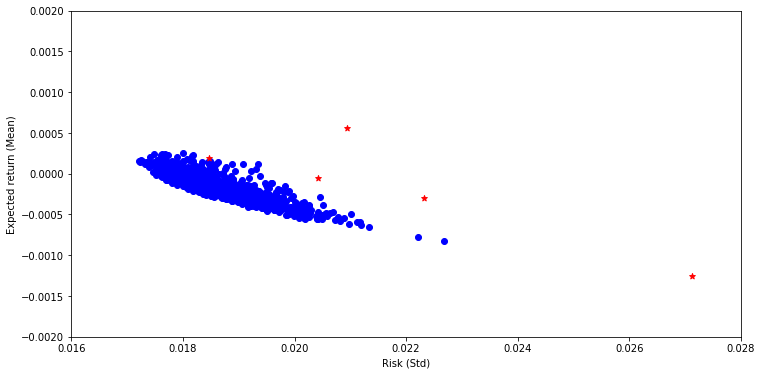

In [25]:
plt.figure(figsize = (12, 6))
plt.scatter(mcStd_1000, mcMu_1000, color='b')
plt.scatter(std, mu, color='r', marker='*')
plt.ylabel('Expected return (Mean)')
plt.xlabel('Risk (Std)')
plt.axis([0.016, 0.028, -0.002, 0.002])
plt.show()

## e) Draw the efficiency frontier in the figure of b), assuming that no short sales are allowed. 

### import module

In [26]:
import scipy.optimize
from functools import reduce

### define function

In [27]:
def get_standard_deviation(weights):
    # return np.sqrt(np.matmul(np.matmul(weight, array_Cov), weight))
    return np.sqrt(reduce(np.dot, [weights, cov, weights.T]))

def get_return(weights):
    return np.sum(mu * weights)

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights) - 1

### 風險最小化投資組合

In [28]:
# 每個變數(權重)的上下界
# bounds = tuple((0, 1) for x in range(nStock))
bounds = ((0, 1), ) * nStock

# 希望所有的變數(權重)總和會為1
# constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1}]
constraints = [{'type': 'eq', 'fun': check_sum},
               # all elements of w to be >= 0
               {'type': 'ineq', 'fun': lambda w: w}]

minimize_variance = scipy.optimize.minimize(get_standard_deviation, x0=weight, constraints=constraints, bounds=bounds)

mvp_risk = minimize_variance.fun
print('風險最小化投資組合預期風險為:', mvp_risk)
mvp_return = sum(minimize_variance.x * mu)
print('風險最小化投資組合預期報酬率為:', mvp_return)

風險最小化投資組合預期風險為: 0.017152155237110316
風險最小化投資組合預期報酬率為: 0.00020789145891936145


In [29]:
print('風險最小化投資組合權重為:')
for i in range(nStock):
    print('\t' + str(return_data.columns[i]), '佔投資組合權重 :', str(format(minimize_variance.x[i], '.4f')))

風險最小化投資組合權重為:
	FB.1 佔投資組合權重 : 0.2274
	GOOG.1 佔投資組合權重 : 0.5098
	NFLX.1 佔投資組合權重 : 0.0000
	AMZN.1 佔投資組合權重 : 0.0000
	AAPL.1 佔投資組合權重 : 0.2628


### efficiency frontier

In [30]:
# method1
# init_guess = [0.01] * nStock

# # 每個變數(權重)的上下界
# bounds = ((0, 1), ) * nStock

# efficient_frontier_return_range = np.linspace(-0.001, 0.00055, 100)
# efficient_frontier_risk_list1 = []

# for possible_return in efficient_frontier_return_range:
#     cons = ({'type': 'eq', 'fun': check_sum},
#             {'type': 'eq', 'fun': lambda w: get_return(w) - possible_return})
    
#     result = scipy.optimize.minimize(get_standard_deviation, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
#     efficient_frontier_risk_list1.append(result['fun'])

# plt.figure(figsize = (12, 6))
# plt.title('Efficient Frontier', fontsize=22, fontweight='bold')
# plt.scatter(mcStd_list, mcMu_list, color='b')
# plt.scatter(std, mu, color='r')
# plt.plot(efficient_frontier_risk_list1, efficient_frontier_return_range, color='g', linewidth=1, marker='o')
# plt.ylabel('Expected return (Mean)')
# plt.xlabel('Risk (Std)')
# plt.axis([0.016, 0.028, -0.002, 0.002])
# plt.show()

In [31]:
# method2

# 每個變數(權重)的上下界
# bounds = tuple((0, 1) for x in range(nStock))
bounds = ((0, 1), ) * nStock

efficient_frontier_return_range = np.linspace(-0.001, 0.00055, 100)
efficient_frontier_risk_list2 = []

               # 希望所有的變數(權重)總和會為1
constraints = [# {'type': 'eq', 'fun': lambda x: sum(x) - 1},
               {'type': 'eq', 'fun': check_sum},
               # all elements of w to be >= 0
               {'type': 'ineq', 'fun': lambda w: w},
               # 達成給定報酬率
               # {'type': 'eq', 'fun': lambda w: sum(w * mu) - efficient_fronter_return}
               {'type': 'eq', 'fun': lambda w: get_return(w) - efficient_fronter_return}]

for efficient_fronter_return in efficient_frontier_return_range:
    efficient_frontier = scipy.optimize.minimize(get_standard_deviation, x0=weight, constraints=constraints, bounds=bounds)
    efficient_frontier_risk_list2.append(efficient_frontier.fun)

### plot

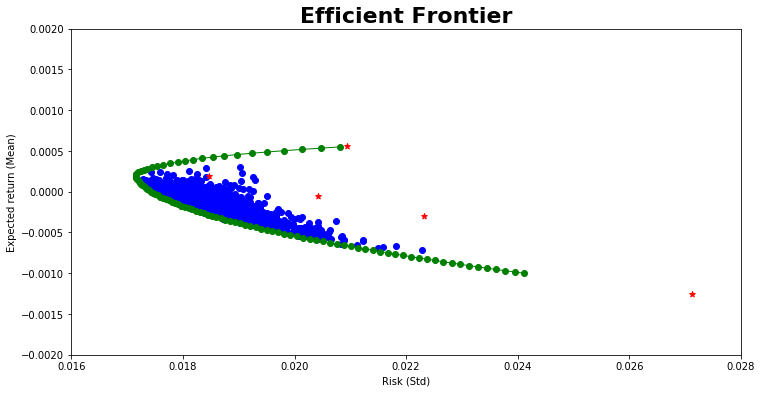

In [32]:
plt.figure(figsize = (12, 6))
plt.title('Efficient Frontier', fontsize=22, fontweight='bold')
plt.scatter(mcStd_list, mcMu_list, color='b')
plt.scatter(std, mu, color='r', marker='*')
plt.plot(efficient_frontier_risk_list2, efficient_frontier_return_range, color='g', linewidth=1, marker='o')
plt.ylabel('Expected return (Mean)')
plt.xlabel('Risk (Std)')
plt.axis([0.016, 0.028, -0.002, 0.002])
plt.show()

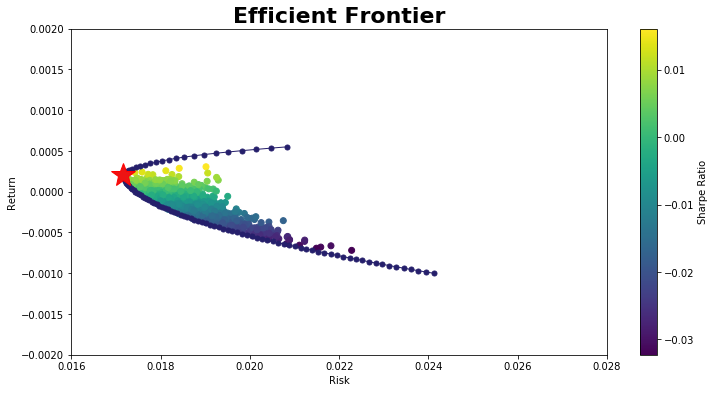

In [33]:
risk_free = 0

fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot()

ax0 = ax.scatter(mcStd_list, mcMu_list, c=(np.array(mcMu_list) - risk_free) / np.array(mcStd_list), marker='o')
ax.plot(efficient_frontier_risk_list2, efficient_frontier_return_range, linewidth=1, color='#251f6b', marker='o', markerfacecolor='#251f6b', markersize=5)
ax.plot(mvp_risk, mvp_return, '*', color='r', markerfacecolor='#ed1313', markersize=25)

ax.set_title('Efficient Frontier', fontsize=22, fontweight='bold')
ax.set_xlabel('Risk')
ax.set_ylabel('Return')
ax.axis([0.016, 0.028, -0.002, 0.002])
fig.colorbar(ax0, ax=ax, label='Sharpe Ratio')

## f) Check if the efficiency frontier in e) is the envelope line of the blue points in d). 

### 可以發現一部份的點的確是在效率前緣上，而效率前緣也的確把所有點包起來